In [42]:
#imports
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.linear_model import PassiveAggressiveClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix , plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import pickle

<AxesSubplot:>

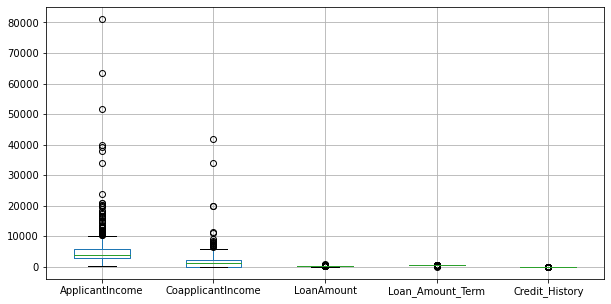

In [53]:
#daset
df=pd.read_csv('train.csv')
#recherche de outliers
df.boxplot(figsize=(10,5))

In [54]:
#missing values
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [55]:
#remplacement des missing values de LoanAmount par la moyenne car il n'ya pas de outliers
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mean(),inplace=True)
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [56]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [57]:
df.mean()

ApplicantIncome      5403.459283
CoapplicantIncome    1621.245798
LoanAmount            146.412162
Loan_Amount_Term      342.000000
Credit_History          0.842199
dtype: float64

In [49]:
model=LogisticRegression(random_state=0)
X=df.iloc[:,[8,10]].values
y=df.Loan_Status.values
score=0
while score<0.90:
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    score=accuracy_score(y_test,y_pred) 
    print(score)



0.8831168831168831
0.8246753246753247
0.7857142857142857
0.8571428571428571
0.8181818181818182
0.7987012987012987
0.8051948051948052
0.7727272727272727
0.7987012987012987
0.8051948051948052
0.8571428571428571
0.8311688311688312
0.8376623376623377
0.7532467532467533
0.8116883116883117
0.8311688311688312
0.8181818181818182
0.8051948051948052
0.8441558441558441
0.8116883116883117
0.7597402597402597
0.8246753246753247
0.7792207792207793
0.8051948051948052
0.7792207792207793
0.8376623376623377
0.7857142857142857
0.7987012987012987
0.7857142857142857
0.7922077922077922
0.7662337662337663
0.8116883116883117
0.7857142857142857
0.7922077922077922
0.8441558441558441
0.7662337662337663
0.7727272727272727
0.8246753246753247
0.8441558441558441
0.8051948051948052
0.8246753246753247
0.8051948051948052
0.8376623376623377
0.8311688311688312
0.8051948051948052
0.8376623376623377
0.7792207792207793
0.7987012987012987
0.8181818181818182
0.8311688311688312
0.7792207792207793
0.8506493506493507
0.8636363636

In [50]:
#nous avons pu ameliorer le score
score=accuracy_score(y_test,y_pred) 
print(f'Accuracy: {round(score*100,2)}%') 


Accuracy: 90.91%


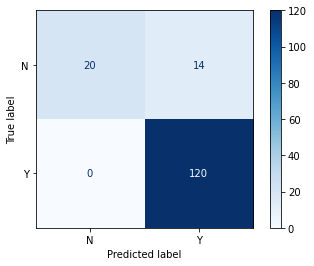

In [51]:
# confusion matrix 
plot_confusion_matrix(model,X_test,y_test,cmap=plt.cm.Blues)


In [52]:
#enregistrement du model
with open('Loan_classifier.pkl', 'wb') as f:
    pickle.dump(model, f)
    
